# Red wine quality prediction

## In this project we will predict whether the wine quality is 'Good' or 'Bad'

Importing all the libraries

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

Reading the data set

In [296]:
wine_data=pd.read_csv('C:/Users/yn/Desktop/Yuvi/DataTrained/PracticeProjets/winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [297]:
wine_data.shape

(1599, 12)

We have 1599 rows and 12 columns

## Exploratory Data Analysis

In [298]:
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Our Target variable 'quality' has 6 discrete values.It means we have 6 different quality of wines availabe in the data set.

In [299]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


 1. There are no null values
 2. All the feature variables are having continous data.
 3. Looks like we have outliers in residual sugar,free sulphur dioxide,total sulphur dioxide

In [300]:
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

It is confirmed that there are no null values in our data set.

##### Lets check for data normalization

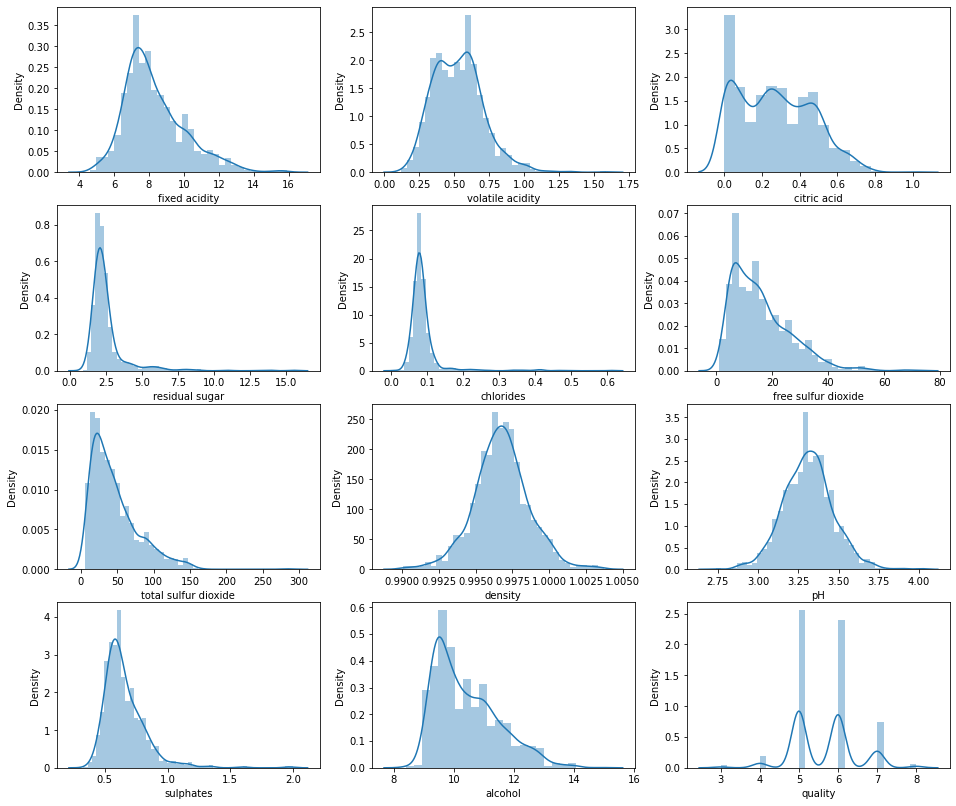

In [301]:
plt.figure(figsize=(16,14))
pltn=1
for col in wine_data.columns:
    ax=plt.subplot(4,3,pltn)
    sns.distplot(wine_data[col])
    pltn+=1
plt.show()

We have skewed data in fixed acidity,volatile acidity,residual sugar,chlorides,free sulphur dioxide,total sulphur diaxide,sulphates,alcohol

##### Univariate analysis

Lets find the linearity between features and the target

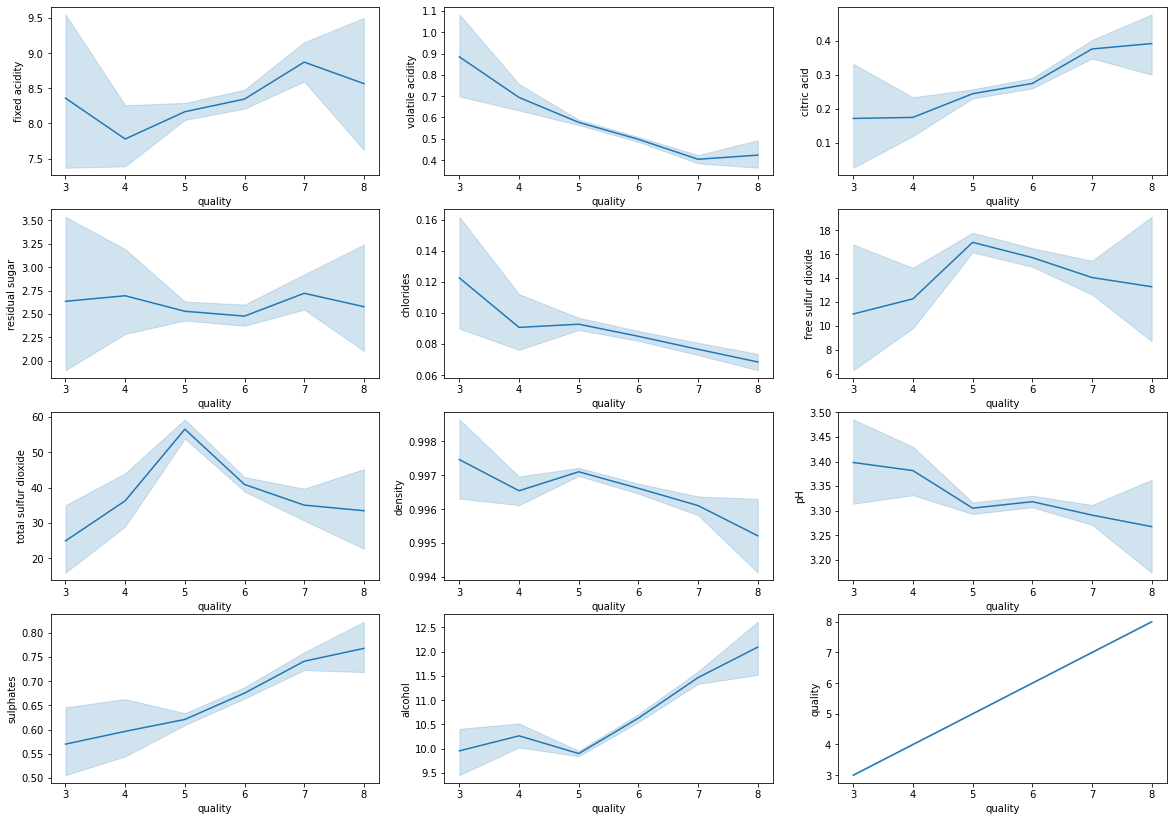

In [302]:
plt.figure(figsize=(20,18))
pltno=1
for col in wine_data.columns:
    ax=plt.subplot(5,3,pltno)
    pltno+=1
    sns.lineplot(x=wine_data['quality'],y=wine_data[col])
    plt.xlabel('quality')
    plt.ylabel(col)
plt.show()

Observations from above plot
1. When the volatile aciidity is less the quality is high.
2. When the citrix acid level is high the quality of wine is good.
3. When the chlorides level is less the quality of the wine is good.
4. Good quality wines are having low density and low PH level.
5. When the sulphates and alcohol levels are high, the quality of the wine is good.

### Checking multi colinearity between the features

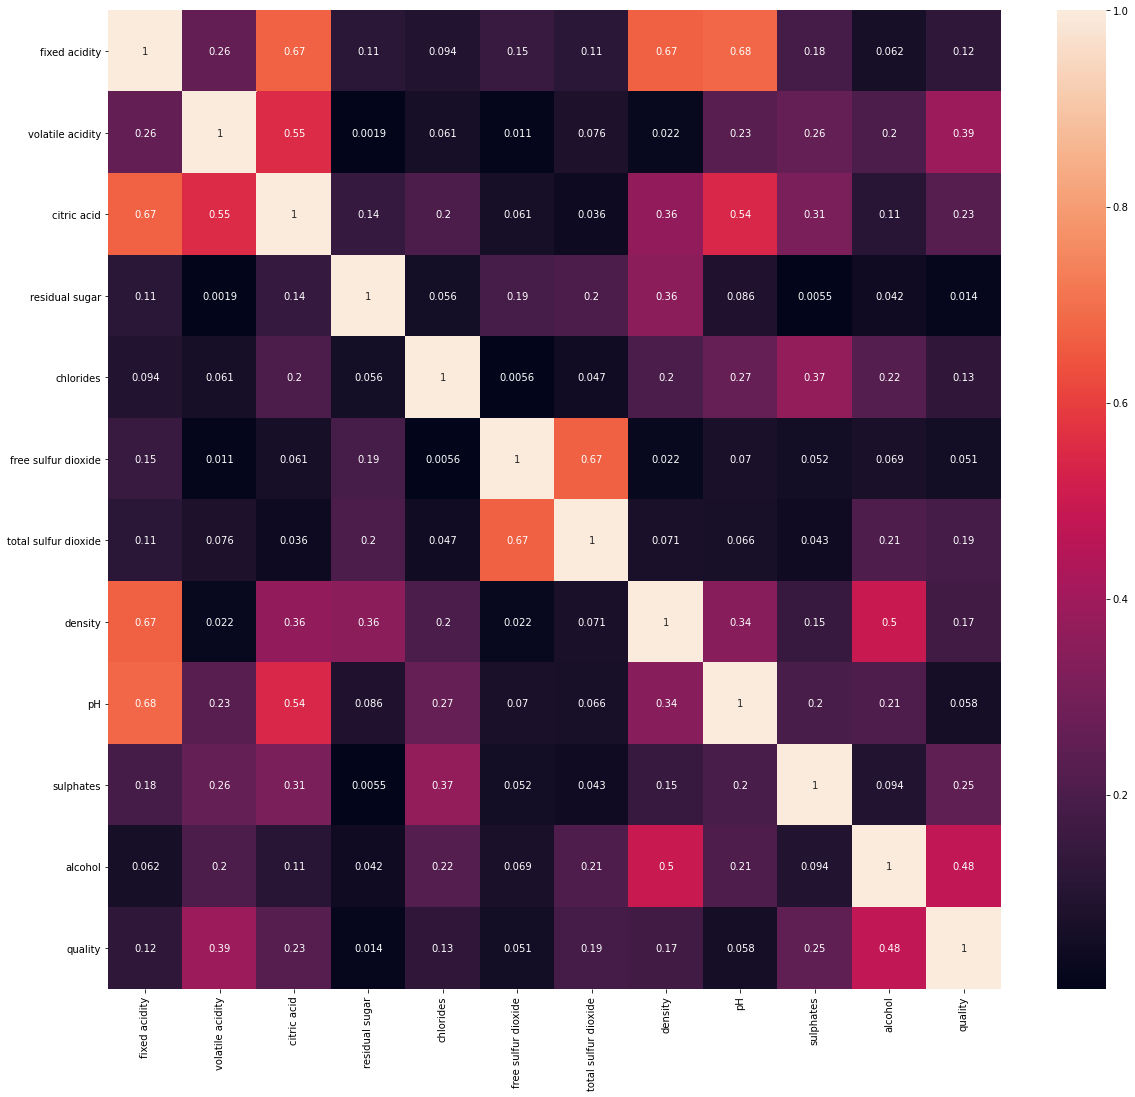

In [303]:
plt.figure(figsize=(20,18))
sns.heatmap(np.abs(wine_data.corr()),annot=True)
plt.show()

 1. From the above heat map, we could not see any strong correlation(>70%) with in any of the features.
 2. Also we can see residual sugar is having very very less correlation with the target varaiable.


##### Removing outliers

In [304]:
wine_data.skew().sort_values()

density                 0.071288
pH                      0.193683
quality                 0.217802
citric acid             0.318337
volatile acidity        0.671593
alcohol                 0.860829
fixed acidity           0.982751
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
sulphates               2.428672
residual sugar          4.540655
chlorides               5.680347
dtype: float64

Again it is confirmed that we have skewed data in our data set.

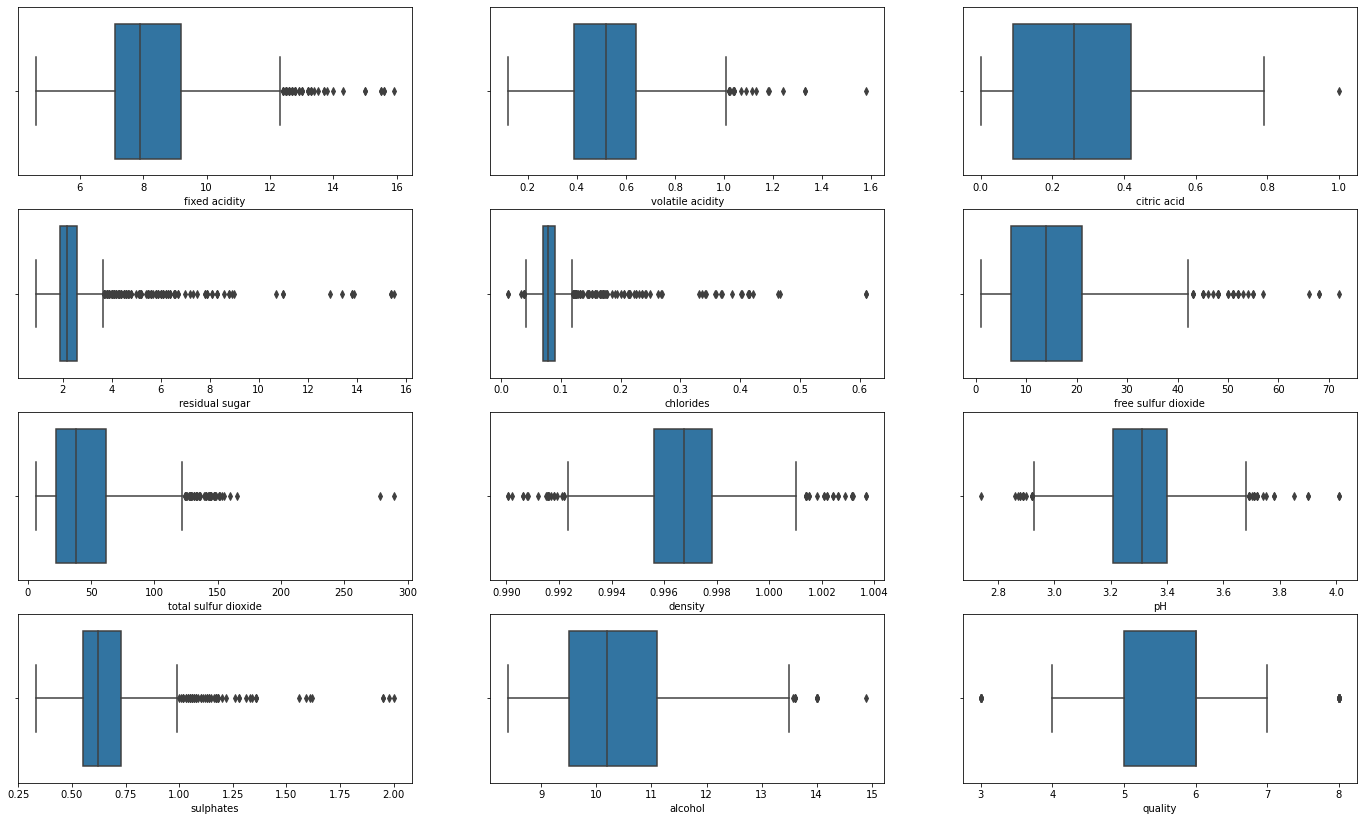

In [305]:
plt.figure(figsize=(24,18))
pltn=1
for col in wine_data.columns:
    ax=plt.subplot(5,3,pltn)
    sns.boxplot(wine_data[col])
    pltn+=1
plt.show()

Box plot also shows that we have outliers in all the fields except citric acid and alcohol.

In [306]:
from scipy.stats import zscore
zscore=zscore(wine_data[['volatile acidity','alcohol','fixed acidity','free sulfur dioxide','total sulfur dioxide','sulphates','chlorides']])
score=np.abs(zscore)
filters=(score<3).all(axis=1)
wine_data=wine_data[filters]
print(wine_data.shape)
wine_data.head()

(1491, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We removed outliers using zscore value and after removing outliers now we have 1491 rows.

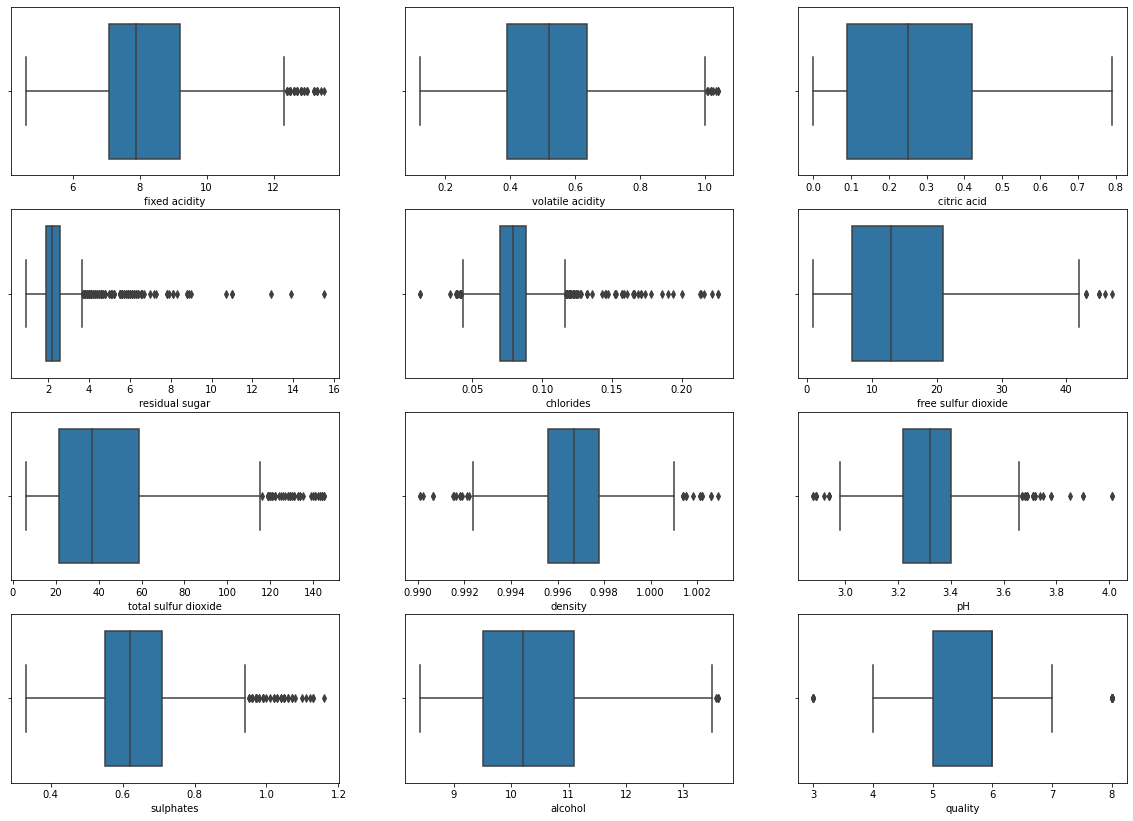

In [307]:
plt.figure(figsize=(20,18))
pltn=1
for col in wine_data.columns:
    ax=plt.subplot(5,3,pltn)
    sns.boxplot(wine_data[col])
    pltn+=1
plt.show()

Even after removing outliers using zscore, still the dataset having few outliers.

In [308]:
wine_data.skew().sort_values()

density                -0.022947
quality                 0.238669
citric acid             0.298116
pH                      0.326986
volatile acidity        0.381043
alcohol                 0.755780
fixed acidity           0.785315
free sulfur dioxide     0.843644
sulphates               0.892224
total sulfur dioxide    1.138927
chlorides               2.170660
residual sugar          4.224090
dtype: float64

##### Removing data skewness

In [309]:
from sklearn.preprocessing import PowerTransformer

In [310]:
import numpy as np
skewed_features=['alcohol','fixed acidity','free sulfur dioxide','sulphates','total sulfur dioxide','chlorides','residual sugar']
#for i in skewed_features:
wine_data[skewed_features]=PowerTransformer().fit_transform(wine_data[skewed_features])
print(wine_data[skewed_features])
print(wine_data.skew().sort_values())

       alcohol  fixed acidity  free sulfur dioxide  sulphates  \
0    -1.108027      -0.450639            -0.255268  -0.577472   
1    -0.528658      -0.163341             1.071579   0.461766   
2    -0.528658      -0.163341             0.221699   0.230424   
3    -0.528658       1.580924             0.422596  -0.381573   
4    -1.108027      -0.450639            -0.255268  -0.577472   
...        ...            ...                  ...        ...   
1594  0.277021      -1.482250             1.510570  -0.381573   
1595  0.885684      -1.790047             1.875638   1.003042   
1596  0.728241      -1.384708             1.333311   0.940827   
1597 -0.040065      -1.790047             1.510570   0.676875   
1598  0.728241      -1.684819             0.515933   0.309434   

      total sulfur dioxide  chlorides  residual sugar  
0                -0.086066  -0.143388       -0.598029  
1                 0.928747   0.951917        0.580642  
2                 0.601020   0.686127        0.1661

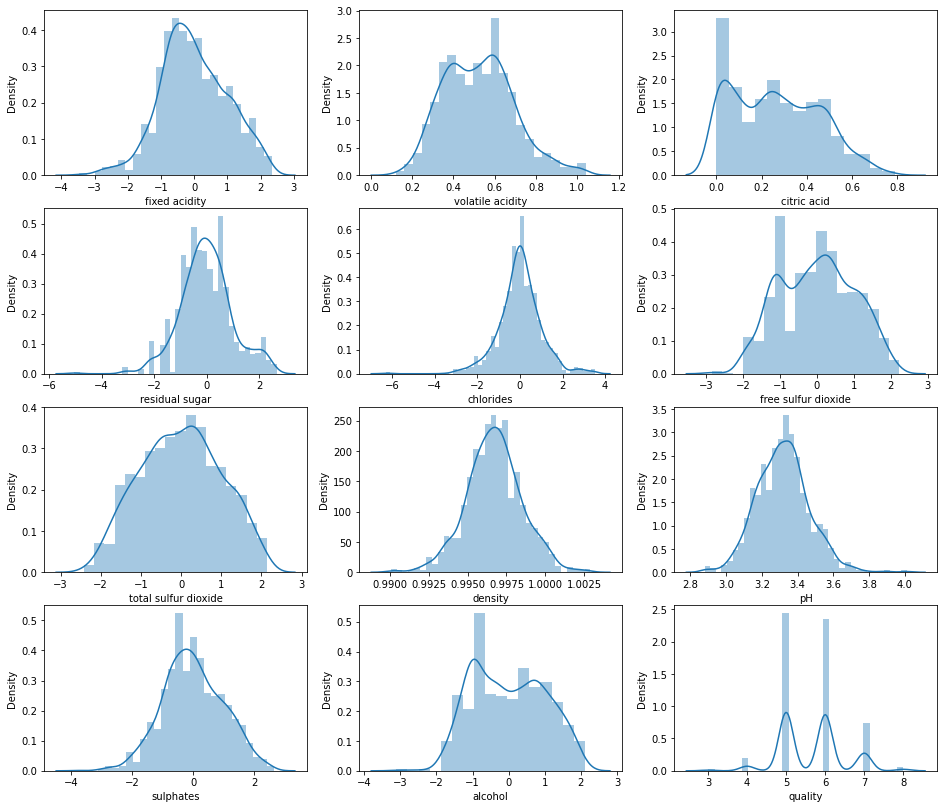

In [311]:
plt.figure(figsize=(16,14))
pltn=1
for col in wine_data.columns:
    ax=plt.subplot(4,3,pltn)
    sns.distplot(wine_data[col])
    pltn+=1
plt.show()

5    627
6    603
7    189
4     49
8     16
3      7
Name: quality, dtype: int64


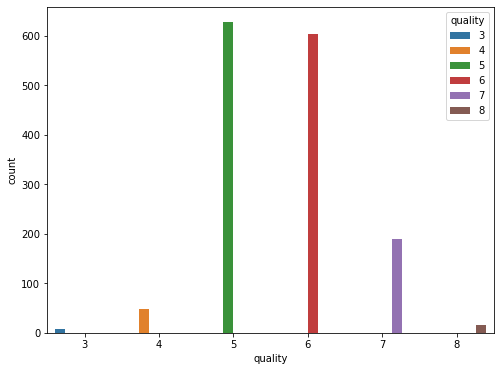

In [312]:
plt.figure(figsize=(8,6))
print(wine_data['quality'].value_counts())
sns.countplot(x=wine_data['quality'],data=wine_data,hue=wine_data['quality'])
plt.show()

Observations:
 1. We have imbalanced data.
 2. more data available in normal(which not too good and not too bad) quality.
 

Since we have imbalanced data we will group the classes into two groups wither 'Good' or 'Bad' quality.
the quality is greater than 7 will be considered as good and quality and rest are will be considered as bad quality.

In [313]:
bin_range= (2,6.5,8)
labels =['bad','good']
wine_data['quality'] = pd.cut(wine_data['quality'],bins=bin_range,labels=labels)


bad     1286
good     205
Name: quality, dtype: int64


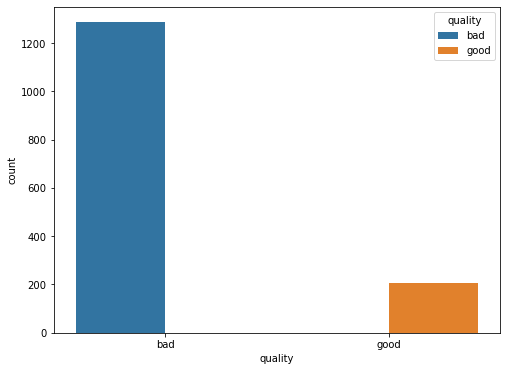

In [314]:
print(wine_data['quality'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x=wine_data['quality'],data=wine_data,hue=wine_data['quality'])
plt.show()

We have more bad quality wine than good quality wine.

In [315]:
from sklearn.preprocessing import LabelEncoder
lbl_enc=LabelEncoder()
wine_data['quality']=lbl_enc.fit_transform(wine_data['quality'])
wine_data['quality'].value_counts()

0    1286
1     205
Name: quality, dtype: int64

In [316]:
y=wine_data['quality']
X=wine_data.drop(['quality'],axis=1)

#### Select K best features

In [317]:
from sklearn.feature_selection import SelectKBest

In [318]:
best_feature=SelectKBest(k=8)
fit=best_feature.fit(X,y)
best_score=pd.DataFrame(fit.scores_)
best_feature=pd.DataFrame(X.columns)
best_scores=pd.concat([best_score,best_feature],axis=1)
best_scores.columns=['Score','Features']
print(best_scores.nlargest(8,'Score'))

         Score              Features
10  284.582627               alcohol
9   147.847506             sulphates
1   116.632067      volatile acidity
2    79.254077           citric acid
6    49.017737  total sulfur dioxide
7    37.477022               density
4    33.583096             chlorides
0    18.479111         fixed acidity


In [319]:
X_new=wine_data[['alcohol','sulphates','volatile acidity','citric acid','total sulfur dioxide','density','chlorides','fixed acidity']]

scaling the input data using standard scalar

In [320]:
X_sc=StandardScaler().fit_transform(X_new)

Importing all the classifier models

In [321]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score

Finding best random state

In [322]:
max_accuracy=0
best_RS=0
for i in range(1,300):
    log_reg=LogisticRegression()
    X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.20,random_state=i)
    log_reg.fit(X_train,y_train)
    y_pred=log_reg.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    if(accuracy>max_accuracy):
        max_accuracy=accuracy
        best_RS=i
print("Max accuracy: ",max_accuracy,'with best Random state: ',best_RS)

Max accuracy:  0.9230769230769231 with best Random state:  197


spliting the datset as train and test set using the above random state

In [323]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.25,random_state=197)

As we have imbalanced data set, we will use SMOTE technique to balance our training set

##### Applying SMOTE techinque to balance the dataset.

In [324]:
print('Training set size before applying SMOTE')
print(X_train.shape)
print(y_train.shape)

Training set size before applying SMOTE
(1118, 8)
(1118,)


In [325]:
from imblearn.over_sampling import SMOTE
X_train,y_train=SMOTE(k_neighbors=3).fit_resample(X_train,y_train)

In [326]:
print('Training set size after applying SMOTE')
print(X_train.shape)
print(y_train.shape)

Training set size after applying SMOTE
(1902, 8)
(1902,)


Now our training dats should have the balanced classes.

## Model selection

In [327]:
log_reg=LogisticRegression()
rf_clf=RandomForestClassifier()
dt_clf=DecisionTreeClassifier()
knn_clf=KNeighborsClassifier()

model=(log_reg,rf_clf,dt_clf,knn_clf)
for m in model:
    m.fit(X_train,y_train)
    y_pred=m.predict(X_test)
    print(m,' Metrics')
    print('====================================')
    print("Accuracy score: ",accuracy_score(y_test,y_pred),'\n')
    print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred),'\n')
    print("Classification report: \n",classification_report(y_test,y_pred),'\n\n')

LogisticRegression()  Metrics
Accuracy score:  0.7882037533512064 

Confusion Matrix: 
 [[261  74]
 [  5  33]] 

Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.78      0.87       335
           1       0.31      0.87      0.46        38

    accuracy                           0.79       373
   macro avg       0.64      0.82      0.66       373
weighted avg       0.91      0.79      0.83       373
 


RandomForestClassifier()  Metrics
Accuracy score:  0.9115281501340483 

Confusion Matrix: 
 [[316  19]
 [ 14  24]] 

Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       335
           1       0.56      0.63      0.59        38

    accuracy                           0.91       373
   macro avg       0.76      0.79      0.77       373
weighted avg       0.92      0.91      0.91       373
 


DecisionTreeClassifier()  Metrics
Accuracy score:  0.8873994

Random Forest classifier provides better accuracy than other models, also it gives less false prediction compare to other models.

## Cross Validation

In [328]:
from sklearn.model_selection import cross_val_score
for m in model:
    score=cross_val_score(m,X_sc,y,cv=5).mean()
    print("Cross validation score for ",m,':',score)   

Cross validation score for  LogisticRegression() : 0.8685394267244281
Cross validation score for  RandomForestClassifier() : 0.8765863841440147
Cross validation score for  DecisionTreeClassifier() : 0.834311238804965
Cross validation score for  KNeighborsClassifier() : 0.8430360710197302


Based on cross validation score also we get better result with RandomForest classifier comparing to other models.

## ROC AUC Curve

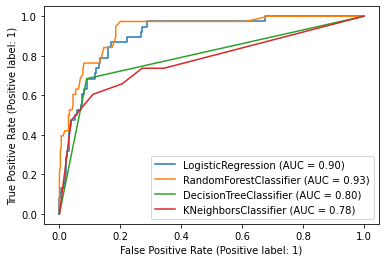

In [329]:
from sklearn.metrics import roc_auc_score,plot_roc_curve
display=plot_roc_curve(log_reg,X_test,y_test)
plot_roc_curve(rf_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(dt_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(knn_clf,X_test,y_test,ax=display.ax_)

The above roc_auc curve shows that LogisticRegression and RandomForestClassifier is having more AUC(Area Under Curve).As both are having same AUC. As we get less false prediction with RandomForestClassifier, will go ahead with RandomForest classifier as final model.

## Final Model - RandomForestClassifier

##### Hyper param tuning

In [330]:
from sklearn.model_selection import GridSearchCV
RandomForestClassifier()
param={'criterion':['gini','entropy'],'max_features':["auto", "sqrt", "log2"],'n_estimators':[60,70,80,90,100]}
grd_srch=GridSearchCV(RandomForestClassifier(),param_grid=param)
grd_srch.fit(X_train,y_train)
grd_srch.best_estimator_

RandomForestClassifier(n_estimators=70)

Training the model with best hyper params received from GridSearch

In [333]:
max_acc=0
best_Rs=0
for i in range(1,100):
    rf_clf=RandomForestClassifier(n_estimators=70,random_state=i)
    rf_clf.fit(X_train,y_train)
    y_pred=rf_clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    if(accuracy>max_acc):
        max_acc=accuracy
        best_Rs=i
print('Best Accuracy: ',max_acc,'\n Best RS: ',best_Rs)
 

Best Accuracy:  0.9222520107238605 
 Best RS:  52


In [334]:
rf_clf=RandomForestClassifier(n_estimators=70,random_state=52)
rf_clf.fit(X_train,y_train)
y_pred=rf_clf.predict(X_test)
print(rf_clf,' Metrics')
print("Accuracy score: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("Classification report: \n",classification_report(y_test,y_pred))

RandomForestClassifier(n_estimators=70, random_state=52)  Metrics
Accuracy score:  0.9222520107238605
Confusion Matrix: 
 [[318  17]
 [ 12  26]]
Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       335
           1       0.60      0.68      0.64        38

    accuracy                           0.92       373
   macro avg       0.78      0.82      0.80       373
weighted avg       0.93      0.92      0.92       373



Our final model able to score 92% of accuracy with 30 false predictions.

## Model Saving

In [335]:
import pickle
#Saving the final model
pickle.dump(rf_clf,open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models- Practice Projects/RedWineQualityPrediction.pkl','wb'))
#loading the model
final_model=pickle.load(open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models- Practice Projects/RedWineQualityPrediction.pkl','rb'))
y_pred=final_model.predict(X_test)
final_result=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
final_result[20:40]

,Actual,Predicted
343,0,0
359,0,0
971,0,0
1553,0,0
112,0,0
1368,0,0
1585,0,1
225,0,0
455,1,0
35,0,0
